<a href="https://colab.research.google.com/github/KokitkarSayali/Task1-prediction-using-Supervised-ML/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sparks Foundation Internship - (Data Science and Buisness Analytics)**

## **Name - Sayali Pandurang Kokitkar**

## Task 1 - Prediction Using Supervised Learning
### Student score prediction ➡

- To predict the percentage of student based on the number of study hours.

- This is a simple linear regression task as it involves just two variables.

---


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
Data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Sparks/student_scores.csv')

In [22]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
Data.shape

(25, 2)

In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking for the null values in the given dataset

In [38]:
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

*There are no null values in the given dataset*

# **Descriptive Statistics**

In [39]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Data Visualization**

In [42]:
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


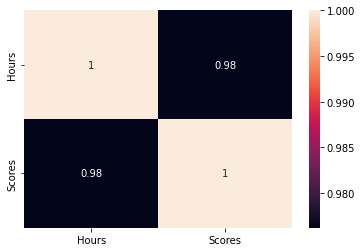

In [41]:
sns.heatmap(Data.corr(),annot=True)
plt.show()

*Above correlation plot shows the higher correlation between Exam score and no of hours studied.*

<Figure size 1152x648 with 0 Axes>

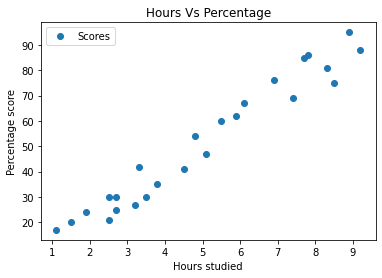

In [50]:
plt.figure(figsize=(16,9))
Data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

### Dividing the data into dependent and independent variable

In [51]:
x = Data.iloc[:,:-1].values  # Independent variable
y = Data.iloc[:,1].values    # Dependent variable
print('x :', x.shape)
print('y :', y.shape)

x : (25, 1)
y : (25,)


### Split the data into training and testing sets

In [52]:
train_x, test_x , train_y  , test_y = train_test_split(x,y,test_size = 0.2)

In [53]:
print('Train set : ',train_x.shape , train_y.shape)
print('Test set : ',test_x.shape , test_y.shape)

Train set :  (20, 1) (20,)
Test set :  (5, 1) (5,)


In [54]:
# train the model

LR = LinearRegression()
LR.fit(train_x,train_y)

LinearRegression()

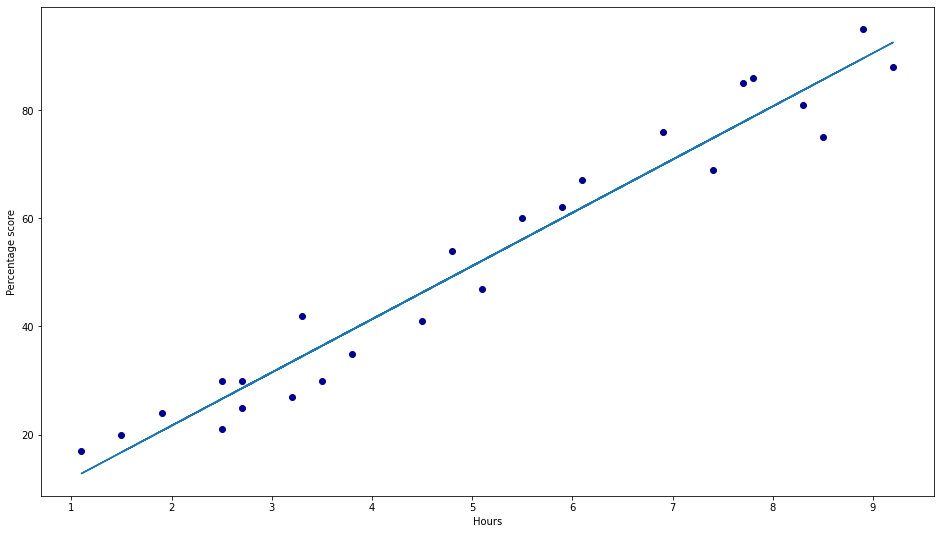

In [65]:
Line = LR.coef_*x + LR.intercept_
plt.figure(figsize=(16,9))
plt.scatter(x,y,color = 'darkblue')
plt.plot(x,Line)
plt.xlabel('Hours')
plt.ylabel('Percentage score')
plt.show()

In [59]:
# predict the scores for test data

pred_y = LR.predict(test_x)
print(pred_y)

[34.45660972 26.5891977  56.09199276 83.62793481 28.5560507 ]


In [60]:
# Comparing actual scores vs predicted scores
pd.DataFrame({'Actual Score ': test_y , 'Predicted Score ':pred_y})

,Actual Score,Predicted Score
0,42,34.456610
1,21,26.589198
2,60,56.091993
3,81,83.627935
4,30,28.556051


In [61]:
df = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})  
df 

,Actual,Predicted
0,42,34.456610
1,21,26.589198
2,60,56.091993
3,81,83.627935
4,30,28.556051


### what will be the score if a student studies for 9.25 hr/day ?

In [62]:
New_hour = [[9.25]]
Z=LR.predict(New_hour)
print("No of hour studied = {} ".format(New_hour[0][0]))
print("Predicted Score = {} ".format(Z[0]))

No of hour studied = 9.25 
Predicted Score = 92.97048657586018 


### Checking the accuracy of the Model 

In [63]:
print("Mean Absolute error : " , metrics.mean_absolute_error(test_y,pred_y))
print("Mean Square error : " , metrics.mean_squared_error(test_y,pred_y))
print("Root Mean Square error : " , np.sqrt(metrics.mean_squared_error(test_y,pred_y)))
print("r2 score : " , metrics.r2_score(test_y,pred_y))

Mean Absolute error :  4.2224958664672085
Mean Square error :  22.481083892045753
Root Mean Square error :  4.741422138140176
r2 score :  0.9514405480126884


In [64]:
print("Task 1 Completed")

Task 1 Completed
